# decision_tree_bed

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_text
from matplotlib import pyplot as plt
from sklearn import tree

# Dataset: Features and Targetc

In [3]:
data = {
    'Size_sqft': [850, 900, 1200, 1500, 1250, 800, 950, 1400, 1000, 1300],
    'Bedrooms': [2, 3, 3, 4, 3, 2, 2, 4, 3, 3],
    'Age_yrs': [5, 7, 10, 15, 20, 4, 8, 12, 9, 11]
}
prices = [165000, 170000, 210000, 250000, 215000, 160000, 180000, 240000, 190000, 220000]

# Convert to DataFrame

In [5]:
X = pd.DataFrame(data)
y = prices

# Initialize and train the DecisionTreeRegressor

In [6]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

# Extract and print the decision rules with feature names

In [7]:
decision_rules = export_text(regressor, feature_names=list(X.columns))
print("Decision tree rules:\n")
print(decision_rules)

Decision tree rules:

|--- Size_sqft <= 1100.00
|   |--- Age_yrs <= 7.50
|   |   |--- Size_sqft <= 825.00
|   |   |   |--- value: [160000.00]
|   |   |--- Size_sqft >  825.00
|   |   |   |--- Bedrooms <= 2.50
|   |   |   |   |--- value: [165000.00]
|   |   |   |--- Bedrooms >  2.50
|   |   |   |   |--- value: [170000.00]
|   |--- Age_yrs >  7.50
|   |   |--- Size_sqft <= 975.00
|   |   |   |--- value: [180000.00]
|   |   |--- Size_sqft >  975.00
|   |   |   |--- value: [190000.00]
|--- Size_sqft >  1100.00
|   |--- Size_sqft <= 1350.00
|   |   |--- Size_sqft <= 1225.00
|   |   |   |--- value: [210000.00]
|   |   |--- Size_sqft >  1225.00
|   |   |   |--- Age_yrs <= 15.50
|   |   |   |   |--- value: [220000.00]
|   |   |   |--- Age_yrs >  15.50
|   |   |   |   |--- value: [215000.00]
|   |--- Size_sqft >  1350.00
|   |   |--- Size_sqft <= 1450.00
|   |   |   |--- value: [240000.00]
|   |   |--- Size_sqft >  1450.00
|   |   |   |--- value: [250000.00]



# Explanation of the first split

In [8]:
first_split_line = decision_rules.split('\n')[0]
print(f"\nThe first split in the tree is based on: {first_split_line}")


The first split in the tree is based on: |--- Size_sqft <= 1100.00


# Predicting price for a new house

In [9]:
new_house = pd.DataFrame({
    'Size_sqft': [1150],
    'Bedrooms': [3],
    'Age_yrs': [12]
})
predicted_price = regressor.predict(new_house)[0]
print(f"\nPredicted price for house (Size=1150 sqft, Bedrooms=3, Age=12 years): ${predicted_price:,.2f}")


Predicted price for house (Size=1150 sqft, Bedrooms=3, Age=12 years): $210,000.00


# Visualize the decision tree structure

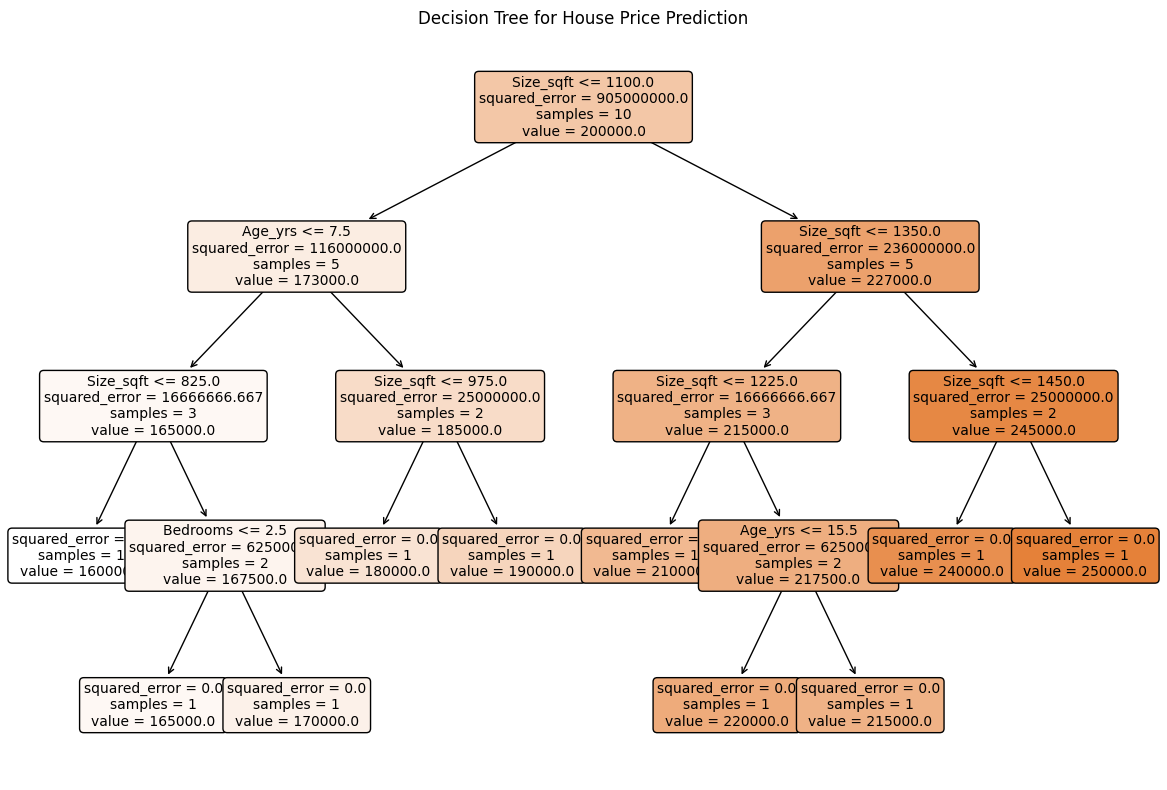

In [10]:
plt.figure(figsize=(12, 8))
tree.plot_tree(
    regressor,
    feature_names=list(X.columns),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for House Price Prediction")
plt.tight_layout()
plt.show()